**数据标准化**

本部分主要采用独热编码处理分类数据，并生成映射关系表

采用TF-IDF将BS（经营范围）转化，并使用KMeans算法聚类，并将其可视化

将CT（创建时间）从字符串类型转换成数值类型

然后采用z-score算法将数据进行标准化,只保留了'cluster'(经营范围),'CT'（创建时间）,'RC'（注册资本）,'DAC'（所属区县）,'TOE'（企业类型）,'FS'（企业规模）,'IBC'（国标行业大类）

**导入数据**

In [1]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# 重新导入文件
csvFile='./out'+os.sep+'data_cleaned.csv'
data = pd.read_csv(csvFile,encoding='utf-8')
# print(data) #全部输出
print("\n输出数据前5条")
print(data.head()) #只输出前五条


输出数据前5条
               name   LS                                                 BS  \
0     吉林省昌农实业集团有限公司  张笑恺  一般项目：中草药种植；中草药收购；谷物种植；食用菌种植；豆类种植；油料种植；薯类种植；花卉种...   
1   吉林省华咨工程技术集团有限公司   刘尚  工程咨询，工程设计，规划咨询，工程监理，工程造价，工程勘察与测量，地产评估，招投标代理，合同...   
2     吉林省英辰科技股份有限公司   吴琼  一般项目：软件开发；软件销售；电子产品销售；机械设备研发；计算机软硬件及辅助设备零售；橡胶制...   
3     吉林省寰旗科技股份有限公司  刘田影  一般项目：信息系统集成服务；广告设计、代理；广告制作；平面设计；卫星技术综合应用系统集成；卫...   
4  长春融成智能设备制造股份有限公司  霍箭东  一般项目：通用设备制造（不含特种设备制造）；通用设备修理；专用设备制造（不含许可类专业设备制...   

       RC          CT        DAC    NOI                   TOE   FS  \
0  4000.0   2001/4/27  长春经济技术开发区   13.0      有限责任公司（自然人投资或控股）  1.0   
1  2000.0   2015/1/30  长春经济技术开发区    9.0         有限责任公司（自然人独资）  1.0   
2  2200.0   2008/1/28        朝阳区   42.0  股份有限公司（非上市、自然人投资或控股）  1.0   
3  2000.0    2010/4/8        朝阳区   37.0  股份有限公司（非上市、自然人投资或控股）  1.0   
4  5230.0  1996/10/21        宽城区  234.0  股份有限公司（非上市、自然人投资或控股）  2.0   

                IS             IBC  
0       科学研究和技术服务业         专业技术服务业  
1       科学研究和技术服务业   

采用独热算法处理分类字符串

处理时间字符串

In [2]:
# # 指定要处理的列
# columns_to_process = ['DAC', 'TOE','IS','IBC']  # 替换为要处理的列名称
# data1 = data
# # 遍历每一列，对每列中的唯一值进行独热编码
# for col in columns_to_process:
#     unique_values = data1[col].unique()
#     # 为每个唯一值创建一个新的数值编码
#     value_mapping = {val: idx for idx, val in enumerate(unique_values)}
#     # 使用map函数将原始值映射为数值编码
#     data1[col] = data1[col].map(value_mapping)

# # 将时间字符串转换为日期时间格式
# data1['CT'] = pd.to_datetime(data1['CT'], format='%Y/%m/%d')

# # 将日期时间格式转换为数值型表示（Unix时间戳）
# data1['CT'] = (data1['CT'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# # 保存处理后的数据集
# csvPath = os.getcwd() + os.sep + 'out' #返回根目录

# # 指定地址并调用函数写入
# csvFile = csvPath + os.sep + 'One_Hot_dataset.csv'
# # 写入
# data1.to_csv(csvFile,encoding='utf_8_sig',index = False)
# print('\n数据写入成功')

# 指定要处理的列
columns_to_process = ['DAC', 'TOE', 'IS', 'IBC']  # 替换为要处理的列名称

# 创建一个字典来保存每列唯一值到数值编码的映射关系
value_mappings = {}

# 遍历每一列，对每列中的唯一值进行数值编码
for col in columns_to_process:
    unique_values = data[col].unique()
    # 为每个唯一值创建一个新的数值编码
    value_mapping = {val: idx for idx, val in enumerate(unique_values)}
    value_mappings[col] = value_mapping
    # 使用map函数将原始值映射为数值编码
    data[col] = data[col].map(value_mapping)

# 保存原始字符串值和其对应的数值编码到一个CSV文件中
mapping_csv_data = {'Column': [], 'Original_Value': [], 'Encoded_Value': []}
for col, mapping in value_mappings.items():
    for original_val, encoded_val in mapping.items():
        mapping_csv_data['Column'].append(col)
        mapping_csv_data['Original_Value'].append(original_val)
        mapping_csv_data['Encoded_Value'].append(encoded_val)

mapping_df = pd.DataFrame(mapping_csv_data)
mapping_csv_file = './out' + os.sep + 'value_mapping.csv'
mapping_df.to_csv(mapping_csv_file, encoding='utf_8_sig', index=False)
print('Value mapping CSV file saved successfully.')

# 将时间字符串转换为日期时间格式
data['CT'] = pd.to_datetime(data['CT'], format='%Y/%m/%d')

# 将日期时间格式转换为数值型表示（Unix时间戳）
data['CT'] = (data['CT'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# 保存处理后的数据集
csvPath = os.getcwd() + os.sep + 'out'  # 返回根目录

# 指定地址并调用函数写入
csvFile = csvPath + os.sep + 'One_Hot_dataset.csv'
# 写入
data.to_csv(csvFile, encoding='utf_8_sig', index=False)
print('Processed dataset saved successfully.')

Value mapping CSV file saved successfully.
Processed dataset saved successfully.


采用TF-IDF将经营范围转化，并使用KMeans算法聚类，并将其可视化

聚类结果已保存到: D:\Jupyter\Enterprise data mining and data analysis2.0\out\clustered_data.csv


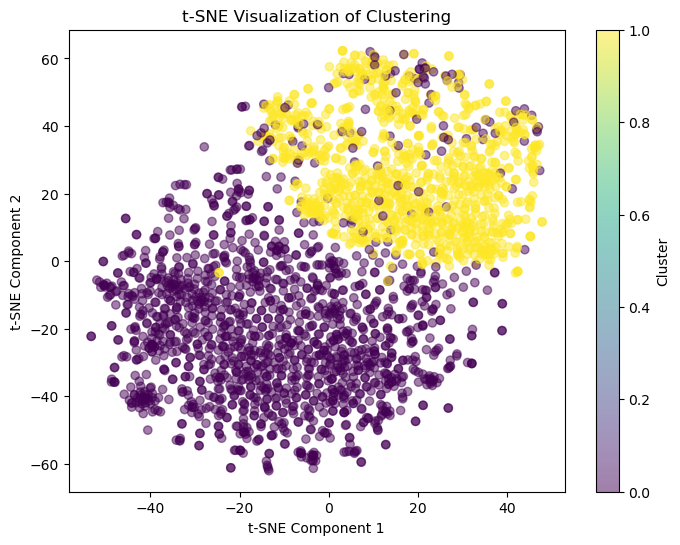

可视化结果已保存到: D:\Jupyter\Enterprise data mining and data analysis2.0\out\cluster_visualization.png


In [11]:
# 读取CSV文件
csvFile = './out' + os.sep + 'One_Hot_dataset.csv'
data = pd.read_csv(csvFile, encoding='utf-8')

# 填充空值
data['BS'].fillna('', inplace=True)

# 创建TF-IDF模型对象
tfidf_vectorizer = TfidfVectorizer()

# 对经营范围进行拟合和转换
bs_tfidf = tfidf_vectorizer.fit_transform(data['BS'])

# 使用KMeans聚类算法对TF-IDF向量进行聚类
kmeans = KMeans(n_clusters=2, n_init='auto')  # 显式设置n_init参数为'auto'
kmeans.fit(bs_tfidf)

# 保存聚类结果到CSV文件
data['cluster'] = kmeans.labels_
cluster_csv_path = os.getcwd() + os.sep + 'out' + os.sep + 'clustered_data.csv'
data.to_csv(cluster_csv_path, encoding='utf_8_sig', index=False)
print('聚类结果已保存到:', cluster_csv_path)

# 使用t-SNE将高维TF-IDF向量转换为二维
tsne = TSNE(n_components=2, init='random')  # 修改初始化为'random'
bs_tfidf_tsne = tsne.fit_transform(bs_tfidf.toarray())  # 将稀疏矩阵转换为密集矩阵

# 绘制聚类结果的二维散点图
plt.figure(figsize=(8, 6))
plt.scatter(bs_tfidf_tsne[:, 0], bs_tfidf_tsne[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.savefig('./image/cluster_visualization.png')  # 保存可视化结果
plt.show()
print('可视化结果已保存到:', os.getcwd() + os.sep + 'out' + os.sep + 'cluster_visualization.png')

**分析聚类结果**

In [12]:
# 读取保存的聚类结果文件
clustered_data = pd.read_csv(cluster_csv_path)

# 创建一个空字典用于存储每个聚类簇的经营范围分析结果
cluster_analysis = {}

# 遍历每个聚类簇
for cluster_id in range(kmeans.n_clusters):
    # 获取当前聚类簇的经营范围数据
    cluster_samples = clustered_data[clustered_data['cluster'] == cluster_id]['BS']
    cluster_samples_str = ' '.join(cluster_samples)
    
    # 统计每个簇中的关键词或短语
    words = cluster_samples_str.split()
    word_counts = pd.Series(words).value_counts()
    top_words = word_counts.head(10).index.tolist()  # 获取出现频率最高的前10个词语
    
    # 将分析结果存储到字典中
    cluster_analysis[cluster_id] = {
        'top_words': top_words,
        'num_samples': len(cluster_samples),
        'examples': cluster_samples_str[:500]  # 获取前500个字符的经营范围示例
    }

# 将分析结果保存到CSV文件
analysis_df = pd.DataFrame.from_dict(cluster_analysis, orient='index')
analysis_csv_path = os.getcwd() + os.sep + 'out' + os.sep + 'cluster_analysis.csv'
analysis_df.to_csv(analysis_csv_path, encoding='utf_8_sig')
print('分析结果已保存到:', analysis_csv_path)

分析结果已保存到: D:\Jupyter\Enterprise data mining and data analysis2.0\out\cluster_analysis.csv


**数据标准化**

对数据进行标准化处理

In [13]:
# One_Hot的标准化
csvFile='./out'+os.sep+'clustered_data.csv'
data00 = pd.read_csv(csvFile,encoding='utf-8')
data01 = data00[['cluster','CT','RC','DAC','TOE','FS','IBC']]
# axis 表示按列(0)或者按行(1)进行计算
data01 = (data01 - data01.mean(axis=0, numeric_only=True)) / data01.std(axis=0, numeric_only=True)
# data = (data - data.mean(axis=0)) / data.std(axis=0)
# 采用列表推导式，进行统一推导
data01.columns = ['Z' + i for i in data01.columns]

# 取 data 的前两列
data_first_two = data00.iloc[:, :2]

# 将前两列插入到 data00 的开头
data01 = pd.concat([data_first_two, data01], axis=1)

print(data01.head())

csvFile = os.getcwd() + os.sep + 'out' + os.sep + 'data_zscore.csv'
data01.to_csv(csvFile,encoding='utf_8_sig', index = False)
print('\n 数据文件存入成功')

               name   LS  Zcluster       ZCT       ZRC      ZDAC      ZTOE  \
0     吉林省昌农实业集团有限公司  张笑恺 -0.815702 -2.926139  0.648728 -1.264098 -0.437196   
1   吉林省华咨工程技术集团有限公司   刘尚 -0.815702 -0.333936  0.190141 -1.264098 -0.018151   
2     吉林省英辰科技股份有限公司   吴琼  1.225476 -1.653762  0.236000 -0.866729  0.400894   
3     吉林省寰旗科技股份有限公司  刘田影  1.225476 -1.240640  0.190141 -0.866729  0.400894   
4  长春融成智能设备制造股份有限公司  霍箭东  1.225476 -3.776625  0.930760 -0.469360  0.400894   

        ZFS      ZIBC  
0 -0.017479 -1.350068  
1 -0.017479 -1.350068  
2 -0.017479 -0.724731  
3 -0.017479 -0.099394  
4  2.425033 -1.350068  

 数据文件存入成功
